# Popular Data Science Questions

- What kind of questions are welcome on this site?
- What, other than questions, does the site's home subdivide into?
- Does any of them look useful towards our goal?
- What information is available in each post?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])



### Exploring the Data

In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [4]:
questions.head(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
5,44430,2019-01-23 11:13:32,0,283,<fuzzy-logic>,1,NaN
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1.0
7,44436,2019-01-23 12:49:39,0,9,<matrix-factorisation>,0,NaN
8,44437,2019-01-23 13:04:11,0,7,<correlation><naive-bayes-classifier>,0,NaN
9,44438,2019-01-23 13:16:29,0,584,<machine-learning><python><deep-learning><kera...,1,NaN


In [5]:
questions.Tags.unique()

array(['<machine-learning><data-mining>',
       '<machine-learning><regression><linear-regression><regularization>',
       '<python><time-series><forecast><forecasting>', ...,
       '<machine-learning><deep-learning><perceptron>',
       '<pca><dimensionality-reduction><linear-algebra>',
       '<keras><weight-initialization>'], dtype=object)

In [6]:
questions["ViewCount"].max()

33203

In [7]:
questions["AnswerCount"].max()

9

In [8]:
questions["FavoriteCount"].max()

16.0

### Cleaning the Data

In [9]:
# clean the "FavoriteCount" column (from float to int)

questions["FavoriteCount"].fillna(0, inplace = True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int, inplace = True)

In [10]:
# clean the"Tags" column


questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")


In [11]:
questions.head(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0


### Most Used Tags

In [12]:
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
            

In [13]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)

In [14]:
most_used = tag_count.sort_values(by = "Count").tail(20)

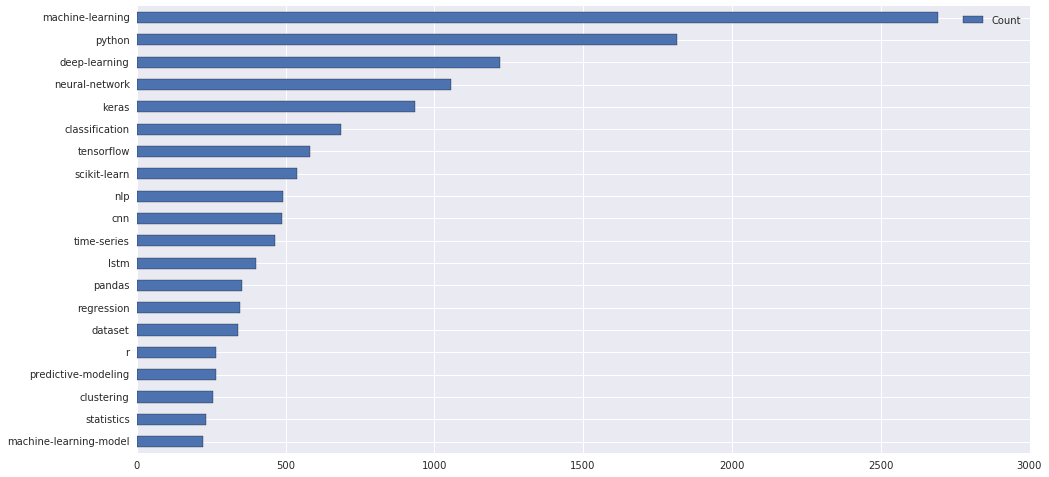

In [15]:
most_used.plot(kind = "barh", figsize = (16, 8))


# Most Viewed Tags

In [16]:
view_count = dict()

for index, row in questions.iterrows():
    for tag in row["Tags"]:
        if tag in view_count:
            view_count[tag] += row["ViewCount"]
        else:
            view_count[tag] = row["ViewCount"]
            

In [17]:
view_count = pd.DataFrame.from_dict(view_count, orient = "index")
view_count.rename(columns={0: "Count"}, inplace=True)

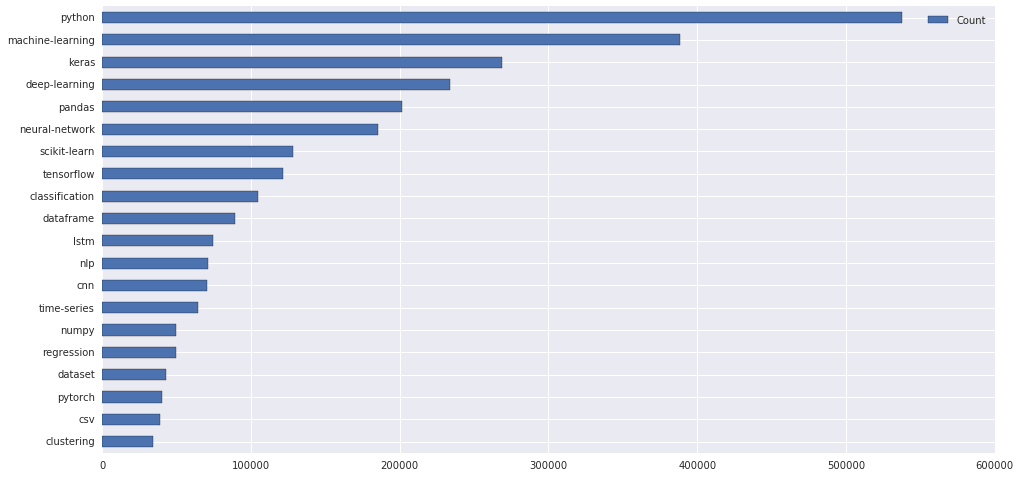

In [18]:
most_viewed = view_count.sort_values(by = "Count").tail(20)

most_viewed.plot(kind = "barh", figsize = (16, 8))

### Relations Between Tags

Let's see what tags are in most_used, but not in most_viewed.

In [19]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used


,Count_x,Count_y
machine-learning-model,224,NaN
statistics,234,NaN
clustering,257,33928.0
predictive-modeling,265,NaN
r,268,NaN
dataset,340,43151.0
regression,347,49451.0
pandas,354,201787.0
lstm,402,74458.0
time-series,466,64134.0


Let's see what tags are in most_viewed, but not in most_used.

In [20]:
in_viewed = pd.merge(most_viewed, most_used, how = "left", left_index = True, right_index = True)
in_viewed


,Count_x,Count_y
clustering,33928,257.0
csv,38654,NaN
pytorch,40240,NaN
dataset,43151,340.0
regression,49451,347.0
numpy,49767,NaN
time-series,64134,466.0
cnn,70349,489.0
nlp,71382,493.0
lstm,74458,402.0


The tags present in most_used and not present in most_viewed are:
- machine-learning-model
- statistics
- predictive-modeling
- r

And the tags present in most_viewed but not in most_used are:
- csv
- pytorch
- dataframe

Some tags also stand out as being related. For example, python is related to pandas, as we can find both pythons and pandas in the same country — or better yet, because pandas is a Python library. So by writing about pandas, we can actually simultaneously tackle two tags.

In [21]:
# Some tags are not related at all like "pandas" and "r". 

questions[questions["Tags"].apply(
    lambda tags: True if "r" in tags and "pandas" in tags else False)
]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
2873,60074,2019-09-11 20:35:17,0,22,"[r, pandas, dplyr]",0,0
3651,49148,2019-04-11 19:41:39,1,83,"[r, data-mining, pandas, matlab, databases]",3,0


One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together. Let's do this.

We'll begin by creating a list of all tags.

In [22]:
tag_list = list(tag_count.index)


We'll now create a dataframe where each row will represent a tag, and each column as well.

In [23]:
associations = pd.DataFrame(index= tag_list, columns = tag_list)

In [24]:
associations.shape

(526, 526)

We will now fill this dataframe with zeroes and then, for each lists of tags in questions["Tags"], we will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [25]:
associations.fillna(0, inplace = True)

In [26]:
for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

In [27]:
associations

,anomaly-detection,hardware,learning,metadata,normalization,actor-critic,rdkit,data,anomaly,difference,...,hyperparameter-tuning,rstudio,weka,statistics,experiments,noise,ann,cloud,audio-recognition,data-mining
anomaly-detection,92,0,0,0,2,0,0,2,2,0,...,0,0,0,1,0,0,0,0,0,5
hardware,0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
learning,0,0,10,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
metadata,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
normalization,2,0,0,0,74,0,0,1,0,0,...,0,0,0,4,0,1,0,0,1,1
actor-critic,0,0,0,0,0,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rdkit,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
data,2,0,1,0,1,0,0,213,0,0,...,1,0,0,10,0,0,0,1,0,23
anomaly,2,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
difference,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0


This dataframe is quite large. Let's focus our attention on the most used tags.

In [28]:
relations_most_used = associations.loc[most_used.index, most_used.index]

In [29]:
relations_most_used

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap.

In [30]:
for i in range(len(list(relations_most_used.index))):
    relations_most_used.iloc[i,i] = pd.np.NaN

In [31]:
relations_most_used

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,NaN,3.0,3.0,21.0,7.0,12.0,8.0,4.0,5.0,7.0,4.0,4.0,18.0,9.0,21.0,17.0,10.0,19.0,37.0,139.0
statistics,3.0,NaN,3.0,16.0,16.0,17.0,16.0,3.0,1.0,22.0,1.0,3.0,6.0,0.0,19.0,3.0,11.0,12.0,35.0,89.0
clustering,3.0,3.0,NaN,0.0,16.0,5.0,2.0,5.0,3.0,20.0,0.0,9.0,24.0,0.0,12.0,0.0,8.0,2.0,45.0,61.0
predictive-modeling,21.0,16.0,0.0,NaN,13.0,7.0,28.0,4.0,13.0,31.0,6.0,1.0,12.0,6.0,27.0,11.0,13.0,32.0,35.0,123.0
r,7.0,16.0,16.0,13.0,NaN,6.0,10.0,2.0,3.0,22.0,2.0,4.0,1.0,1.0,10.0,10.0,9.0,5.0,24.0,63.0
dataset,12.0,17.0,5.0,7.0,6.0,NaN,6.0,14.0,7.0,6.0,11.0,11.0,9.0,9.0,28.0,13.0,20.0,32.0,53.0,99.0
regression,8.0,16.0,2.0,28.0,10.0,6.0,NaN,6.0,11.0,24.0,6.0,2.0,37.0,9.0,34.0,31.0,42.0,21.0,59.0,119.0
pandas,4.0,3.0,5.0,4.0,2.0,14.0,6.0,NaN,7.0,19.0,1.0,3.0,37.0,3.0,3.0,3.0,1.0,1.0,244.0,62.0
lstm,5.0,1.0,3.0,13.0,3.0,7.0,11.0,7.0,NaN,87.0,24.0,19.0,2.0,43.0,20.0,133.0,69.0,103.0,61.0,71.0
time-series,7.0,22.0,20.0,31.0,22.0,6.0,24.0,19.0,87.0,NaN,8.0,0.0,12.0,9.0,25.0,51.0,33.0,44.0,105.0,131.0


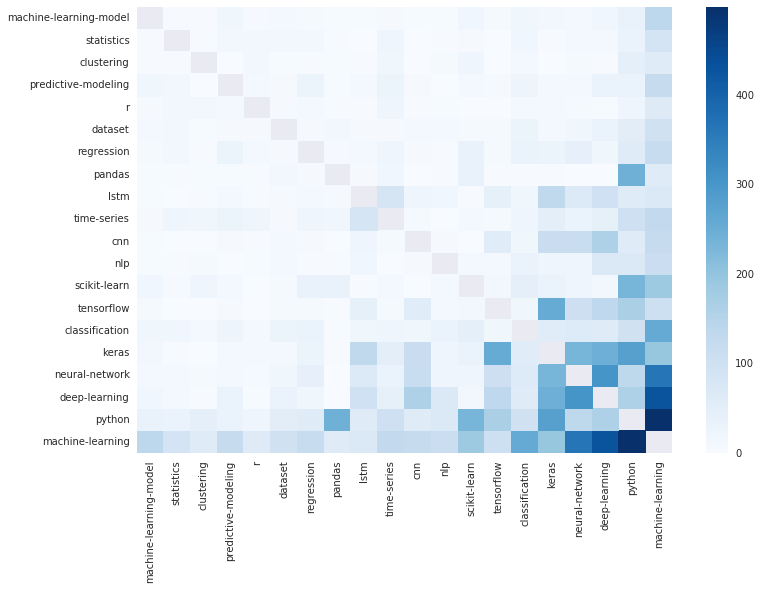

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Blues", annot=False)

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

So how do we attack both these problems? There is a powerful data mining technique that allows us to handle this: association rules. Association rules allow us to analytically spot relations like "people who purchase milk, also purchase eggs". Moreover, we can also measure how strong this relations are on several fronts: how common the relation is, how strong it is, and how independent the components of the relationship are (toilet paper and bread are probably more independent than eggs and milk — you'll learn more about statistical independence) in the next step).

We won't get into the details of it, as the technique is out of scope for this course, but it is a path worth investigating!

### Enter Domain Knowledge

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

In [33]:
all_q = pd.read_csv("all_questions.csv", parse_dates = ["CreationDate"])


In [34]:
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")


In [35]:
def deep_learn(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
        else:
            return 0
 

In [36]:
all_q["deep_learning"] = all_q["Tags"].apply(deep_learn)

In [37]:
all_q.head()

,Id,CreationDate,Tags,deep_learning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0


The data-science-techonology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking. Let's track it quarterly.

Since we don't have all the data for the first quarter of 2020, we'll get rid of those dates:

In [38]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]


Let's create a column that identifies the quarter in which a question was asked.

In [39]:
def quarter(date):
    year = str(date.year)[-2:]
    q = "Q"
    if date.month < 4:
        quarter = str(1)
    elif date.month < 7:
        quarter = str(2)
    elif date.month < 10:
        quarter = str(3)
    else:
        quarter = str(4)
    return str(year + q + quarter)


In [40]:
pd.options.mode.chained_assignment = None  # default='warn'

In [41]:
all_q["Quarter"] = all_q["CreationDate"].apply(quarter)

In [42]:
all_q.head()

,Id,CreationDate,Tags,deep_learning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1



For the final stretch of this screen, we'll group by quarter and:

- Count the number of deep learning questions.
- Count the total number of questions.
- Compute the ratio between the two numbers above.

In [46]:
quarterly = all_q.groupby('Quarter').agg({"deep_learning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
    
quarterly.reset_index(inplace = True)


In [47]:
quarterly

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
0,14Q2,3,157,0.019108
1,14Q3,4,189,0.021164
2,14Q4,4,216,0.018519
3,15Q1,5,190,0.026316
4,15Q2,6,284,0.021127
5,15Q3,13,311,0.041801
6,15Q4,19,382,0.049738
7,16Q1,38,516,0.073643
8,16Q2,45,518,0.086873
9,16Q3,69,585,0.117949


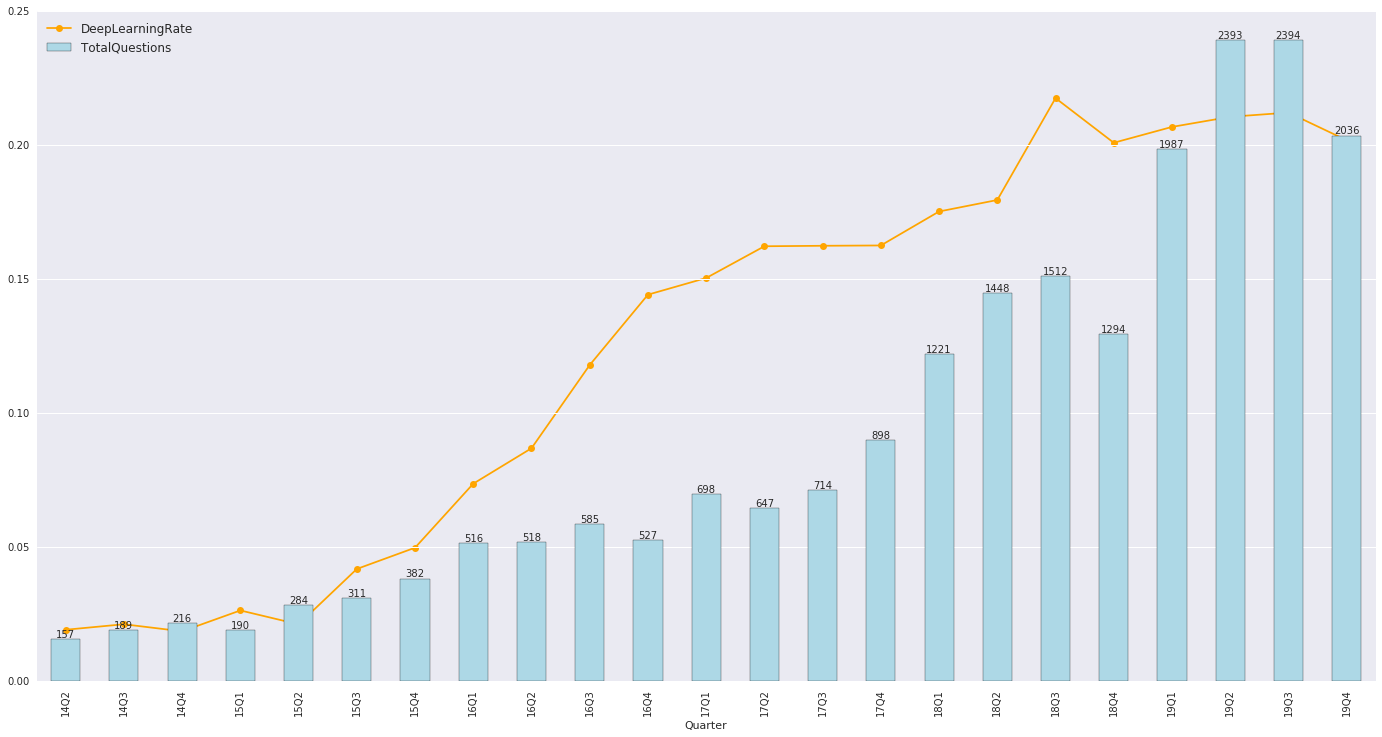

In [56]:

ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions", ax = ax1, 
                     secondary_y = True, kind = "bar", color = "lightblue")

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})

for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)



It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.